# Demo Data View File

This file may be used to view the open-loop data that was used to train the controller models for this work.

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import io

## View Data for Simulation Studies
The next few cells plot and examine the data as well as the predictions of the linear model learned from the data. This data and model were used in the simulation studies of the work, but were collected from the experimental setup.

      Ts (degC)      I (a.u.)  P (W)  q (slm)
0         33.65  9.373740e+05    1.5      3.5
1         33.62  6.896790e+05    1.5      3.5
2         33.43  6.303913e+05    1.5      3.5
3         32.90  5.622200e+05    1.5      3.5
4         32.93  6.410619e+05    1.5      3.5
...         ...           ...    ...      ...
3835      51.86  1.471212e+06    4.5      3.0
3836      51.83  1.495386e+06    4.5      3.0
3837      51.97  1.491573e+06    4.5      3.0
3838      51.79  1.456939e+06    4.5      3.0
3839      51.83  1.453891e+06    4.5      3.0

[3840 rows x 4 columns]
[[3.36500000e+01 9.37373960e+05 1.50000000e+00 3.50000000e+00]
 [3.36200000e+01 6.89679007e+05 1.50000000e+00 3.50000000e+00]
 [3.34300000e+01 6.30391266e+05 1.50000000e+00 3.50000000e+00]
 ...
 [5.19700000e+01 1.49157266e+06 4.50000000e+00 3.00000000e+00]
 [5.17900000e+01 1.45693864e+06 4.50000000e+00 3.00000000e+00]
 [5.18300000e+01 1.45389139e+06 4.50000000e+00 3.00000000e+00]]


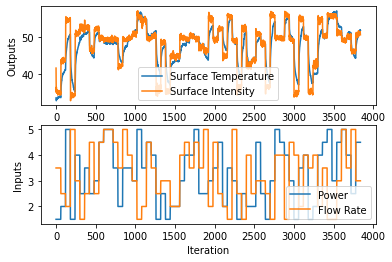

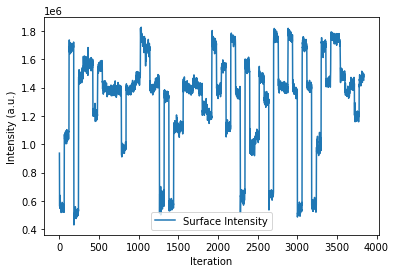

In [2]:
## load open loop data
data = pd.read_csv('2021_06_08_15h57m55s_dataCollectionOL.csv')
print(data)
data = data.to_numpy()
print(data)
I_scaled = False

# scale I to Ts range
Imin = np.min(data[:,1])
Imax = np.max(data[:,1])
Tmin = np.min(data[:,0])
Tmax = np.max(data[:,0])
Idata = (data[:,1] - Imin)/(Imax-Imin) # normalize to [0, 1]
Idata = Idata*(Tmax-Tmin) + Tmin # scale to Ts range

# plot to visualize data
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(data[:,0], label='Surface Temperature')
ax.plot(Idata, label='Surface Intensity')
ax.set_xlabel('Iteration')
ax.set_ylabel('Outputs')
# ax.set_title('Outputs')
ax.legend()
ax = fig.add_subplot(212)
ax.plot(data[:,2], label='Power')
ax.plot(data[:,3], label='Flow Rate')
ax.set_xlabel('Iteration')
ax.set_ylabel('Inputs')
# ax.set_title('Inputs')
ax.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data[:,1], label='Surface Intensity')
ax.set_xlabel('Iteration')
ax.set_ylabel('Intensity (a.u.)')
ax.legend()
plt.show()

In [3]:
## load system matrices from model identification
model = io.loadmat('APPJmodel_2021_06_08_15h57m55s_n4sid_alldata.mat')
A = model['A']
B = model['B']
C = model['C']
xss = np.ravel(model['yss']) # [Ts; I] 
uss = np.ravel(model['uss']) # [P; q]
print('Linear Model to be used for CONTROL:')
print('A: ', A)
print('B: ', B)
print('C: ', C)
print('xss: ', xss)
print('uss: ', uss)
I_scale_factor = float(model['dataInfo']['InormFactor'])
print('Scaling Factor for I: ', I_scale_factor)
if not I_scaled:
    data[:,1] /= I_scale_factor # scale I before plotting with model predictions
    I_scaled = True

Linear Model to be used for CONTROL:
A:  [[0.90268351 0.0175441 ]
 [0.13155243 0.24256854]]
B:  [[ 0.58145481 -0.22042118]
 [ 2.67365891 -1.13104991]]
C:  [[1 0]
 [0 1]]
xss:  [33.306       7.73575879]
uss:  [1.5 3.5]
Scaling Factor for I:  75000.0


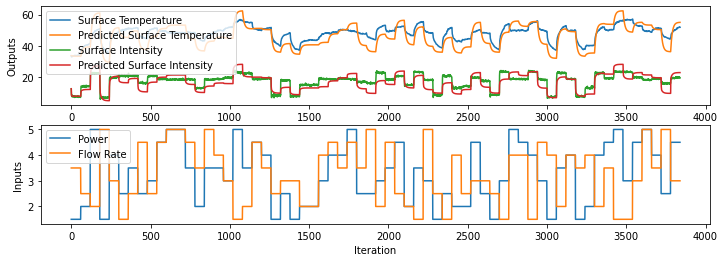

In [4]:
## make predictions and evaluate model
Nsim = len(data[:,0])-1
Ypred = np.zeros_like(data[:,:2])
Ypred[0,:] = np.ravel(data[0,:2]-xss)
for k in range(Nsim):
    x = Ypred[k,:].reshape(-1,1)
    u = (data[k,2:]-uss).reshape(-1,1)

    Ypred[k+1,:] = np.ravel(A@x+B@u)
    
# plot to visualize data
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(211)
ax.plot(data[:,0], label='Surface Temperature')
ax.plot(Ypred[:,0]+xss[0], label='Predicted Surface Temperature')
ax.plot(data[:,1], label='Surface Intensity')
ax.plot(Ypred[:,1]+xss[1], label='Predicted Surface Intensity')
ax.set_xlabel('Iteration')
ax.set_ylabel('Outputs')
# ax.set_title('Outputs')
ax.legend()
ax = fig.add_subplot(212)
ax.plot(data[:,2], label='Power')
ax.plot(data[:,3], label='Flow Rate')
ax.set_xlabel('Iteration')
ax.set_ylabel('Inputs')
# ax.set_title('Inputs')
ax.legend()
plt.show()

## View Data for Experiemental Studies
The next few cells plot and examine the data as well as the predictions of the linear model learned from the data. This data and model were used in the experimental studies of the work and were recollected to mitigate any changes/modifications that may have affected the setup in the interim downtime.

      Ts (degC)      I (a.u.)  P (W)  q (slm)
0         32.77  1.549008e+06    0.0      0.0
1         32.90  1.365612e+06    0.0      0.0
2         32.15  1.352694e+06    0.0      0.0
3         31.73  1.393314e+06    0.0      0.0
4         31.44  1.391719e+06    0.0      0.0
...         ...           ...    ...      ...
2935      45.82  2.046720e+06    2.0      3.5
2936      46.03  2.028950e+06    2.0      3.5
2937      45.97  2.004732e+06    2.0      3.5
2938      46.01  2.056143e+06    2.0      3.5
2939      46.04  2.026195e+06    2.0      3.5

[2940 rows x 4 columns]
[[3.27700000e+01 1.54900842e+06 0.00000000e+00 0.00000000e+00]
 [3.29000000e+01 1.36561192e+06 0.00000000e+00 0.00000000e+00]
 [3.21500000e+01 1.35269401e+06 0.00000000e+00 0.00000000e+00]
 ...
 [4.59700000e+01 2.00473191e+06 2.00000000e+00 3.50000000e+00]
 [4.60100000e+01 2.05614326e+06 2.00000000e+00 3.50000000e+00]
 [4.60400000e+01 2.02619462e+06 2.00000000e+00 3.50000000e+00]]


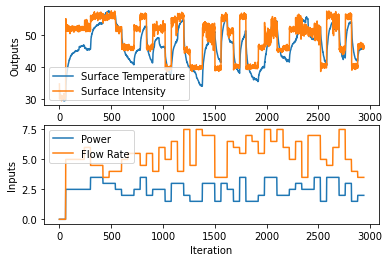

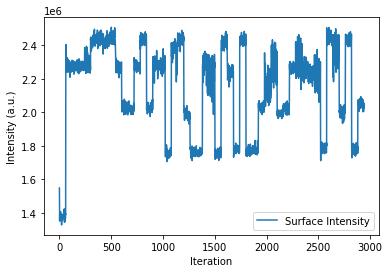

In [5]:
## load open loop data
data = pd.read_csv('../src/ExperimentalData/2022_09_22_17h28m06s/OL_data_0_inputOutputData.csv')
print(data)
data = data.to_numpy()
print(data)
I_scaled = False

# scale I to Ts range
Imin = np.min(data[:,1])
Imax = np.max(data[:,1])
Tmin = np.min(data[:,0])
Tmax = np.max(data[:,0])
Idata = (data[:,1] - Imin)/(Imax-Imin) # normalize to [0, 1]
Idata = Idata*(Tmax-Tmin) + Tmin # scale to Ts range

# plot to visualize data
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(data[:,0], label='Surface Temperature')
ax.plot(Idata, label='Surface Intensity')
ax.set_xlabel('Iteration')
ax.set_ylabel('Outputs')
# ax.set_title('Outputs')
ax.legend()
ax = fig.add_subplot(212)
ax.plot(data[:,2], label='Power')
ax.plot(data[:,3], label='Flow Rate')
ax.set_xlabel('Iteration')
ax.set_ylabel('Inputs')
# ax.set_title('Inputs')
ax.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data[:,1], label='Surface Intensity')
ax.set_xlabel('Iteration')
ax.set_ylabel('Intensity (a.u.)')
ax.legend()
plt.show()

In [6]:
## load system matrices from Data model ID
model = io.loadmat('APPJmodel_2022_09_22_17h28m06s.mat')
Ap = model['A']
Bp = model['B']
Cp = model['C']
xssp = np.ravel(model['yss']) # [Ts; I]
ussp = np.ravel(model['uss']) # [P; q]
print('Linear Model to be used for the PLANT:')
print('A: ', Ap)
print('B: ', Bp)
print('C: ', Cp)
I_scale_factor = float(model['dataInfo']['InormFactor'])
print('Scaling Factor for I: ', I_scale_factor)
if not I_scaled:
    data[:,1] /= I_scale_factor # scale I before plotting with model predictions
    I_scaled = True

Linear Model to be used for the PLANT:
A:  [[0.87961855 0.050736  ]
 [0.07259994 0.10313115]]
B:  [[ 0.52683709 -0.02892313]
 [ 4.88837041 -1.03759631]]
C:  [[1 0]
 [0 1]]
Scaling Factor for I:  50000.0


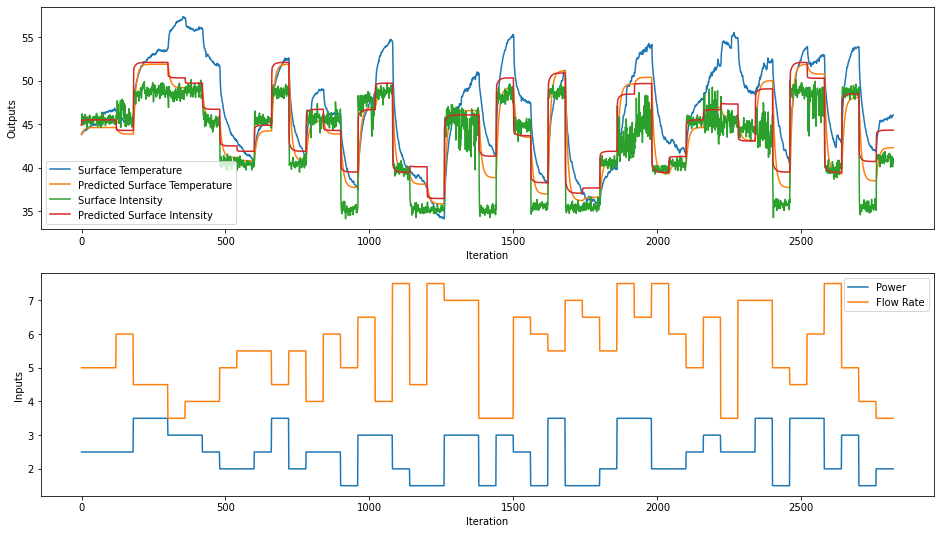

In [7]:
start_k = 120
Nsim = len(data[start_k:,0])-1
Ypred = np.zeros_like(data[start_k:,:2])
Ypred[0,:] = np.ravel(data[start_k,:2]-xssp)
for k in range(Nsim):
    x = Ypred[k,:].reshape(-1,1)
    u = (data[start_k+k,2:]-ussp).reshape(-1,1)

    Ypred[k+1,:] = np.ravel(Ap@x+Bp@u)
    
    
# plot to visualize data
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(211)
ax.plot(data[start_k:,0], label='Surface Temperature')
ax.plot(Ypred[:,0]+xssp[0], label='Predicted Surface Temperature')
ax.plot(data[start_k:,1], label='Surface Intensity')
ax.plot(Ypred[:,1]+xssp[1], label='Predicted Surface Intensity')
ax.set_xlabel('Iteration')
ax.set_ylabel('Outputs')
# ax.set_title('Outputs')
ax.legend()
ax = fig.add_subplot(212)
ax.plot(data[start_k:,2], label='Power')
ax.plot(data[start_k:,3], label='Flow Rate')
ax.set_xlabel('Iteration')
ax.set_ylabel('Inputs')
# ax.set_title('Inputs')
ax.legend()
plt.show()